# 9장. 데이터 분석 프로젝트 - 한국인의 삶을 파악하라 

## 한국복지패널 데이터 분석
- 한국보건사회연구원에서 우리나가 가구의 경제활동을 연구한 데이터
- 전국 7,000여 가구를 선정하여 2006년 부터 매년 추적 조사한 자료
- 경제활동, 생활실태, 복지욕구 등 천여개 변수로 구성됨
- 통계 패키지 SPSS 전용 파일
- bit.ly/easypy_91

## 학습 목표

### 09-1 ‘한국복지패널 데이터’ 분석 준비하기

### 09-2 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 09-3 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 09-4 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

### 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### 09-6 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 09-7 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

### 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

### 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?
#

# 9-1 한국복지패널 데이터 분석 준비하기

### Lab 1 : 데이터 분석 준비하기

1. 데이터 준비하기
- Koweps_hpwc14_2019_beta2.sav 파일을 다운로드
- 2020년 발간된 복지패널 데이터로, 6331가구, 14,418명 정보를 담고 있음

2. 패키지 설치 및 로드하기
- 실습에 사용항 데이터 파일은 통계 분석 패키지인 SPSS 전용 파일임
- pyreadstat 패키지를 설치하면 SPSS, SAS, STATA등 다양한 통계 분석 소프트웨어 데이터 파일을 불러 올 수 있음
- pip install pyreadstat

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
# pyreadstat 패키지 설치
!pip install pyreadstat

In [9]:
# pyreadstat 패키지의 설치 정보 확인
!pip show pyreadstat

Name: pyreadstat
Version: 1.2.7
Summary: Reads and Writes SAS, SPSS and Stata files into/from pandas data frames.
Home-page: https://github.com/Roche/pyreadstat
Author: Otto Fajardo
Author-email: pleasecontactviagithub@notvalid.com
License: Apache License Version 2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: pandas
Required-by: 


3. 데이터 불러오기
- pd.read_spss()로 데이터 불러오기
- df.copy()로 복사본을 만들어 분석에 활용함

In [11]:
# SPSS 통계 패키지 전용 파일 데이터 불러오기
# SPSS(Statistical Package for the Social Sciences)는 사회 과학용 통계 패키지로 IBM 소유 패키지
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

In [12]:
# 데이터 분석 작업용 복사본 만들기
welfare = raw_welfare.copy()

4. 데이터 검토하기
- 데이터의 특성을 살펴보기
- 행, 열 개수
- 변수 속성
- 요약 통계량

In [14]:
# 데이터 구조 특징 살펴보기
# 변수의 수가 많고 변수명이 코드로 되어 있어서 전체 구조 파악이 힘들다.
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [15]:
welfare.tail()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN
14417,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [16]:
# 행과 열 개수 출력
welfare.shape

(14418, 830)

In [17]:
# 변수 속성 출력
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [18]:
# 요약 통계량
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


5. 변수명 바꾸기
- 복지데이터와 같은 대규모 데이터는 변수의 수가 많고 변수명이 코드로 되어 있음
- 규모가 큰 조사 자료의 경우 데이터 특징을 설명한 코드북(codebook)을 함께 제공
- 코드북에는 변수명과 값의 의미가 설명되어 있음 (코드북을 통해 데이터 특징과 분석 방향 아이디어 도출)
- 복지 데이터 코드북 일부: Koweps_Codebook_2019.xlsx
- 복지 데이터 출처 : bit.ly/easypy_91
- 7개 변수를 선정하여 분석함
   - (1단계) 변수검토 및 전처리 - 변수 특징을 파악하고, 이상치와 결측치 정제
   - (2단계) 변수 간 관계 분석 - 데이터 요약 표와 특징을 알 수 있는 그래프를 만들고 해석

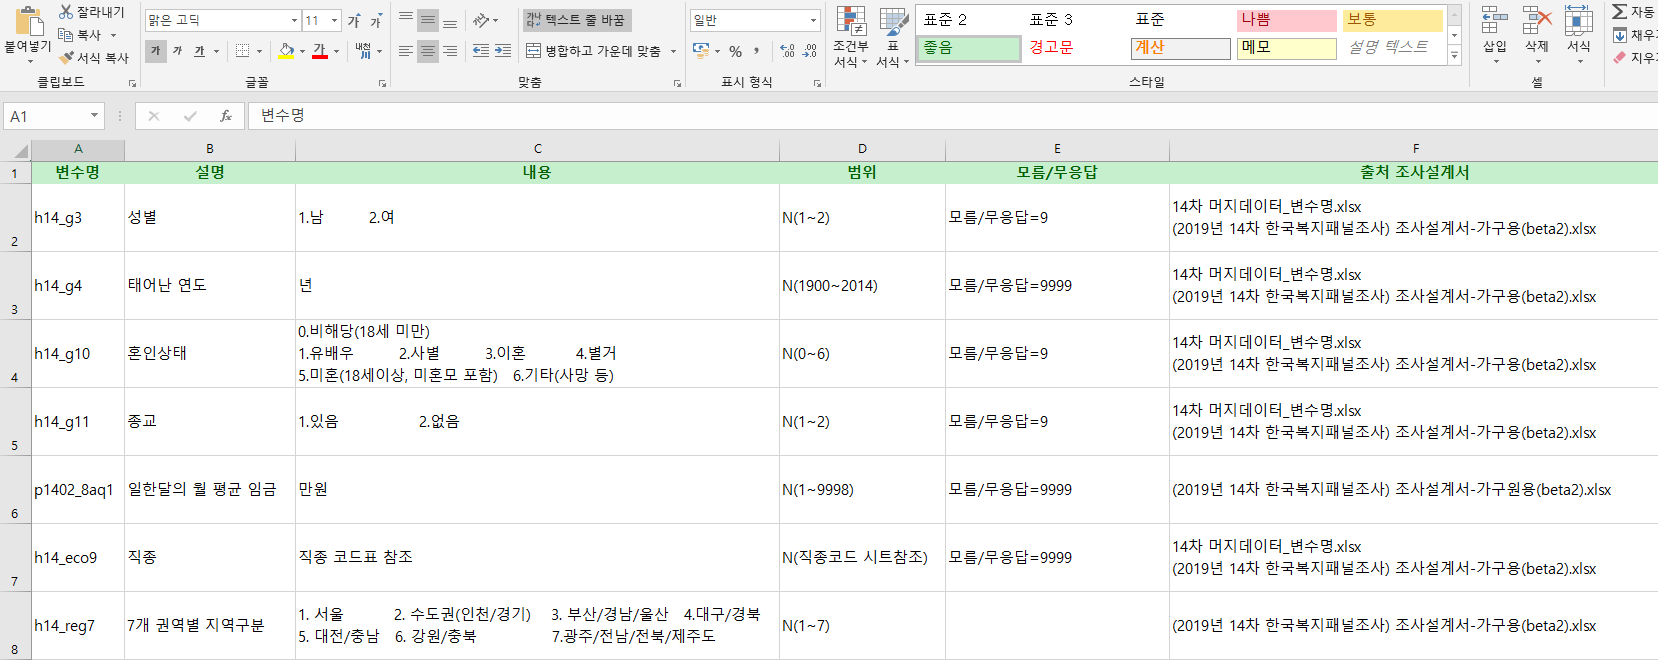

In [21]:
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경  
welfare = welfare.rename(
   columns = {'h14_g3'     : 'sex',              # 성별
              'h14_g4'     : 'birth',            # 태어난 연도
              'h14_g10'    : 'marriage_type',    # 혼인 상태
              'h14_g11'    : 'religion',         # 종교
              'p1402_8aq1' : 'income',           # 일한달의 월 평균 임금
              'h14_eco9'   : 'code_job',         # 직종
              'h14_reg7'   : 'code_region'       # 7개 권역별 지역 구분
             })

In [22]:
# 바뀐 변수명으로 데이터 확인
welfare[['sex', 'birth', 'marriage_type']].head()

,sex,birth,marriage_type
0,2.0,1945.0,2.0
1,1.0,1948.0,2.0
2,1.0,1942.0,3.0
3,1.0,1962.0,1.0
4,2.0,1963.0,1.0


#
# 데이터 분석 절차 살펴보기

## 1단계 - 변수 검토 및 전처리
### 1) 분석에 활용할 변수 전처리
### 2) 변수의 특징 파악, 이상치와 결측치 정제
### 3) 변수의 값을 다루기 편하게 바꾸기
### 4) 분석에 활용할 변수 각각 전처리 ex) 성별에 따른 월급 차이: 성별, 월급 각각
## 2단계 - 변수 간 관계 분석
### 1) 변수 간 관계 분석
### 2) 데이터 요약 표, 그래프 만들기
### 3) 분석 결과 해석

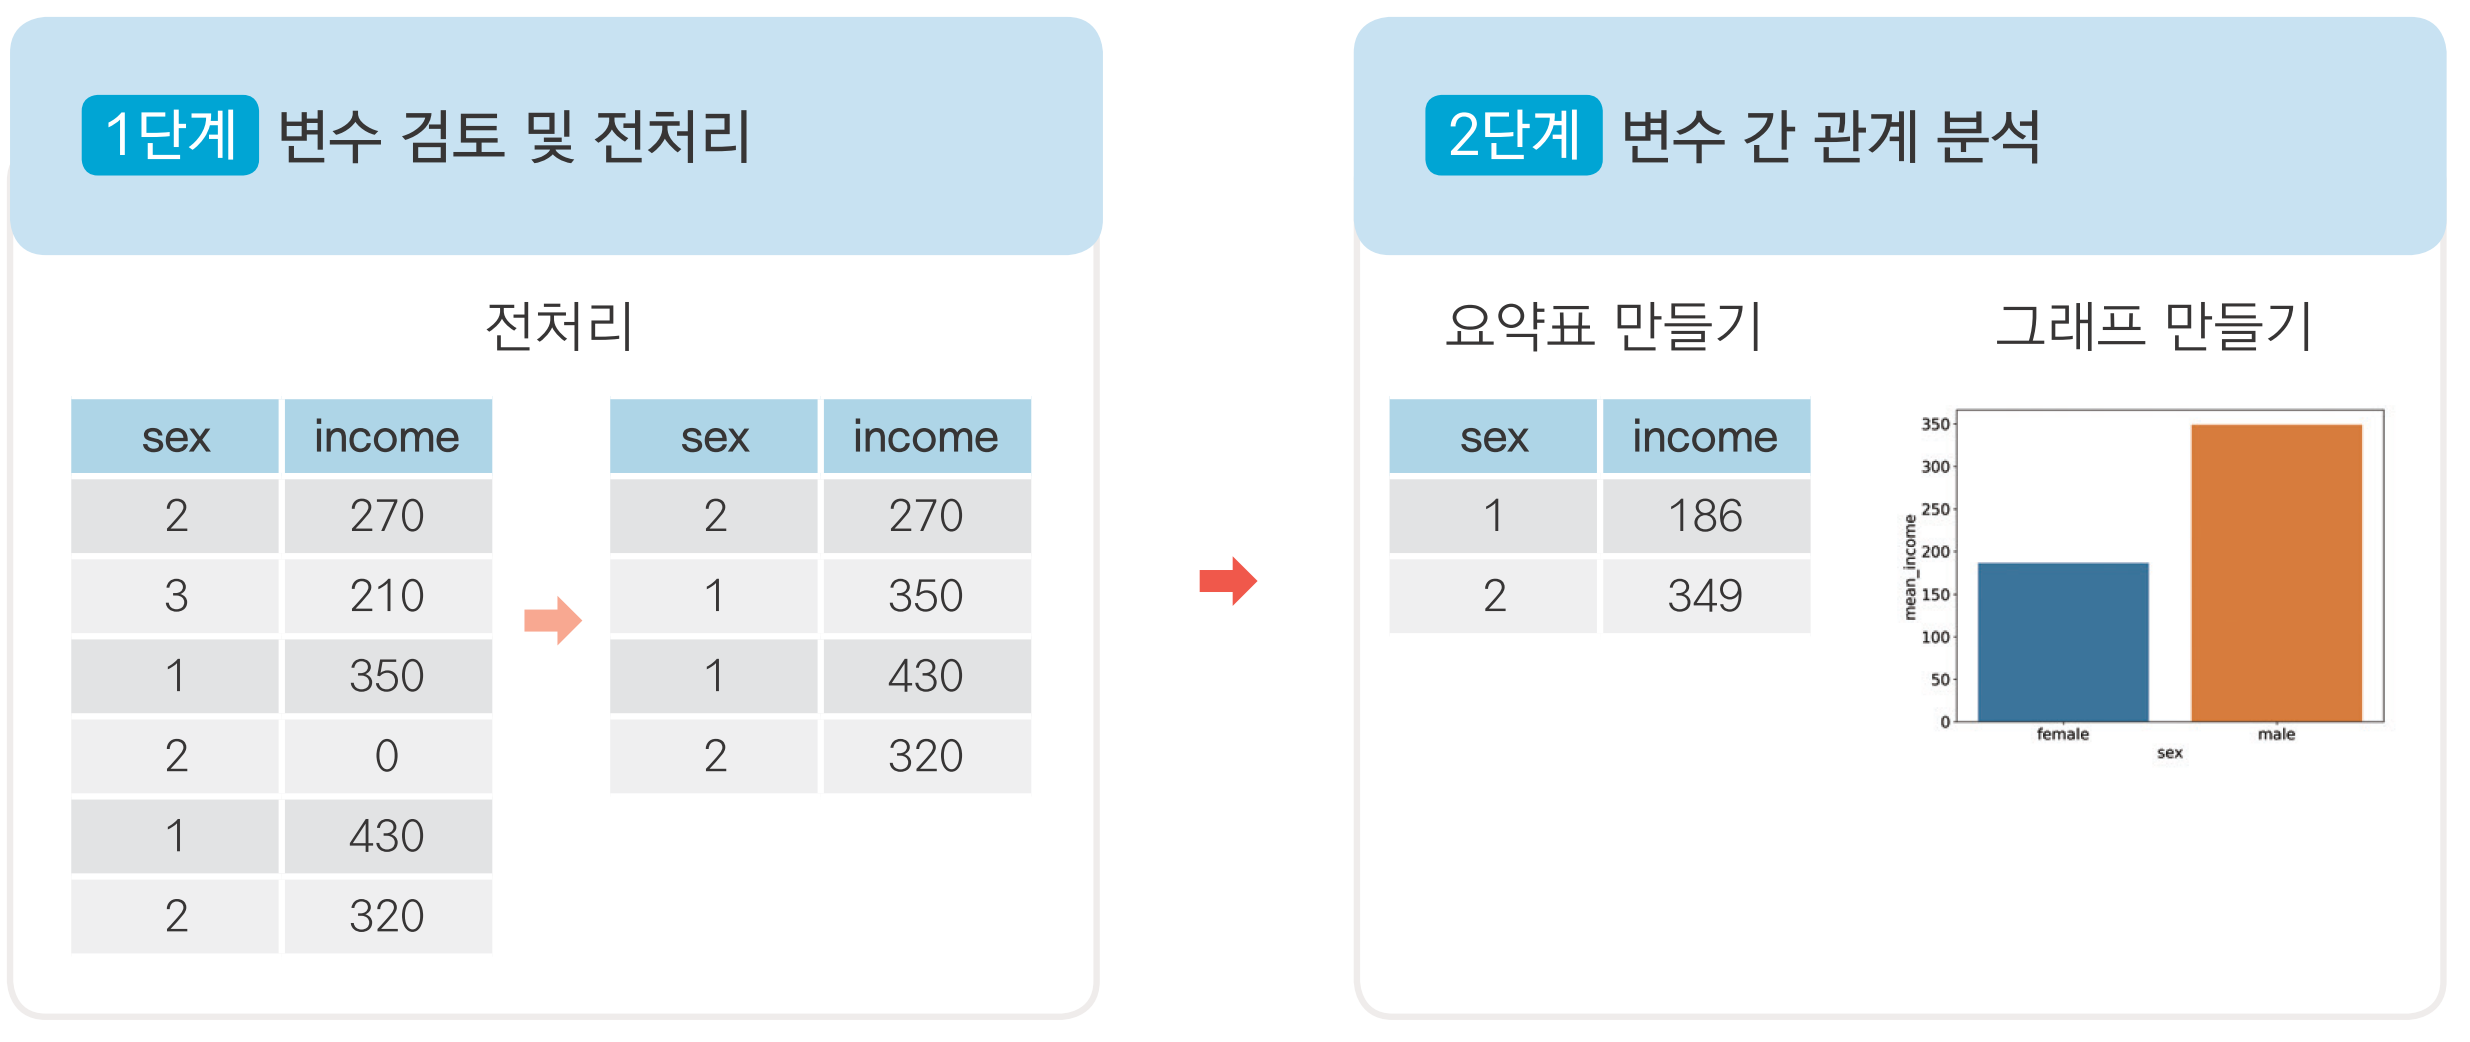

# 9-2 성별에 따른 월급 차이 - 성별에 따라 월급에 차이가 있을까?
> ## Lab 2 : 성별 변수 검토 및 전처리하기
> ## Lab 3 : 월급 변수 검토 및 전처리하기
> ## Lab 4 : 성별에 따른 월급 차이 분석하기

## Lab 2 : 성별 변수 검토 및 전처리하기

1. 변수 검토 하기

In [27]:
# 성별 변수의 데이터 타입 확인
welfare['sex'].dtypes

dtype('float64')

In [28]:
type(welfare['sex'])

pandas.core.series.Series

In [29]:
# 성별 분류별 빈도 수 구하기 (성별은 1, 2로 구성)
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

- 성별 값에 대한 코드북 확인
- 여자 7913명, 남자 6505명
- 모름/무응답(9) 값은 없는 것으로 확인됨
|   값     |   내용      |
| ---      | ----        |
| 1        | 남자        |
| 2        | 여자        |
| 9        | 모름/무응답 |

2. 전처리 하기
- 남자(1), 여자(2) 값 이외에 모름/무응답(9)이나 기타 이상차가 있는 경우 결측 처리
- sex 변수의 값 1, 2에 대해 값의 의미를 알기 쉽도록 'male', 'female'로 변경

> 남자(1), 여자(2) 값 이외에 모름/무응답(9)이나 기타 이상차가 있는 경우 결측 처리

In [33]:
# 이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [34]:
# 이상치에 대한 결측치 처리
# 현재는 sex 변수에 대해 1, 2 값 이외의 이상치는 없으나 이상치에 대한 결측 처리 수행
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

In [35]:
# 결측치 확인
welfare['sex'].isna().sum()

0

> sex 변수의 값 1, 2에 대해 값의 의미를 알기 쉽도록 'male', 'female'로 변경

In [37]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [38]:
# 성별 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

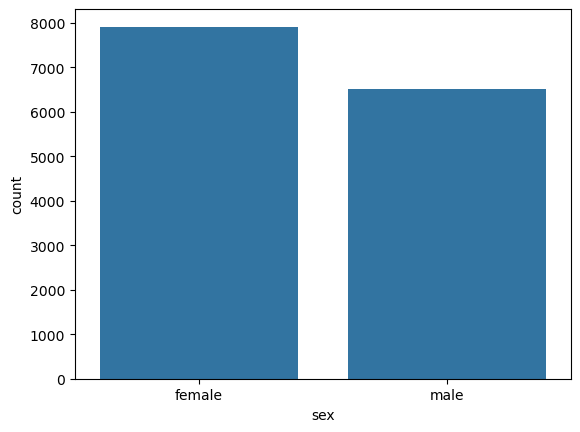

In [39]:
# 성별 빈도수에 따른 막대 그래프 그리기
sns.countplot(data=welfare, x='sex')

## countplot을 사용하지 않고, barplot을 사용해서 그리려면?

In [41]:
result = welfare.groupby('sex', as_index=False)\
                    .agg(n = ('sex', 'count'))
result

,sex,n
0,female,7913
1,male,6505


<Axes: xlabel='sex', ylabel='n'>

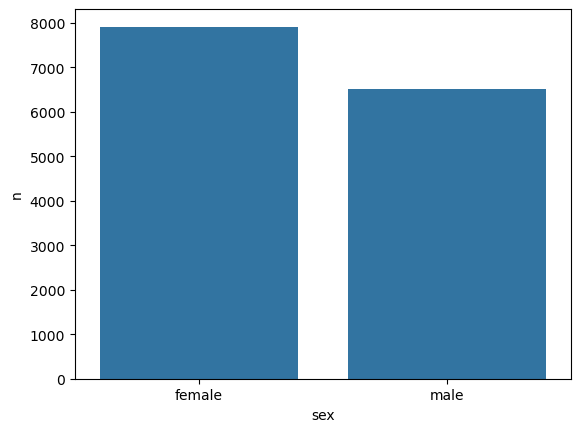

In [42]:
sns.barplot(result, x= 'sex', y ='n')

## Lab 3 : 월급 변수 검토 및 전처리하기

1. 변수 검토 하기
- 코드북 : 월급은 '일한 달의 월 평균 임금'으로 1만원 단위 기록
- 월급은 연속 변수로 그룹별 빈도수(df.value_counts())로 파악하기 어려움
- 연속 변수는 df.describe()로 요약 통계량으로 파악하는 것이 바람직

In [45]:
# 월급 변수의 데이터 타입 확인
welfare['income'].dtypes

dtype('float64')

In [46]:
# 월급의 요약 통계량 구하기
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

> 월급 요약 통계량 분석
- 0만원 ~ 1892만원 분포
- 150만원 ~ 345만원에 가장 많이 분포
- 평균 값은 268.445만원
- 중앙 값은 220만원 (전반적으로 낮은 값 쪽으로 치우쳐 있음)

<Axes: xlabel='income', ylabel='Count'>

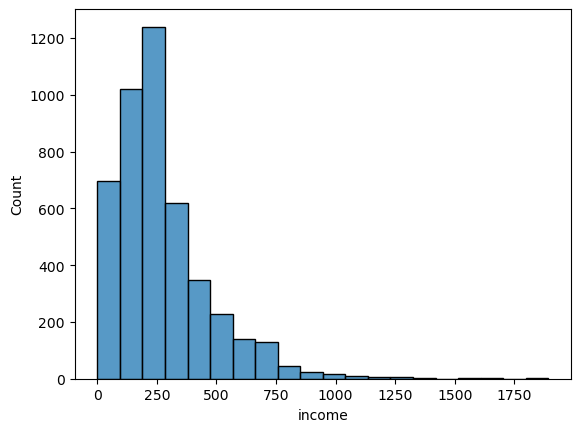

In [48]:
# 월급 분포를 히스토그램으로 확인
sns.histplot(data=welfare, x='income', bins=20)

#sns.histplot(data=welfare, x='income', bins = 10)

> 0 ~ 250만원 대에 가장 많은 사람이 분포하고, 그 뒤로 점차 빈도가 감소 

2. 전처리 하기

- 코드북을 보면, 원급은 만원 단위로 되어 있고
- 모름/무응답은 9999로 코딩됨
|  문항 내용    |  모름/무응답      |
| ---      | ----        |
| 만원      | 9999       |


> 이상치나 결측치 확인
- 월급의 값이 9999인 경우, 이상치로 판단하여 결측 처리
- 결측치 확인

In [53]:
# 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [54]:
welfare['income'].head()

0      NaN
1      NaN
2    107.0
3    192.0
4      NaN
Name: income, dtype: float64

> 이상치 확인 : 월급 최대치가 1892만원으로 모름/무응답인 9999값은 없는 것으로 확인

In [56]:
#이상치 확인 .
welfare.query('income == 9999')[['income']]

,income


In [57]:
# 이상치(9999) 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [58]:
# 결측치 확인
welfare['income'].isna().sum()

9884

> 결측치가 9884개가 있는 것으로 확인

In [60]:
# 결측치 제거 
welfare.dropna(subset=['income'])['income'].isna().sum()

0

 
## Lab 4 : 성별에 따른 월급 차이 분석하기

1. 성별 월급 평균표 만들기

In [63]:
sex_income = welfare.dropna(subset = ['income'])\
                    .groupby('sex', as_index = False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income


 

,sex,mean_income
0,female,186.293096
1,male,349.037571


> 남성의 평균 월급은 349만원, 여성의 평균 월급은 186만원으로 남성이 여성보다 약 163만원이 많다

<Axes: xlabel='sex', ylabel='mean_income'>

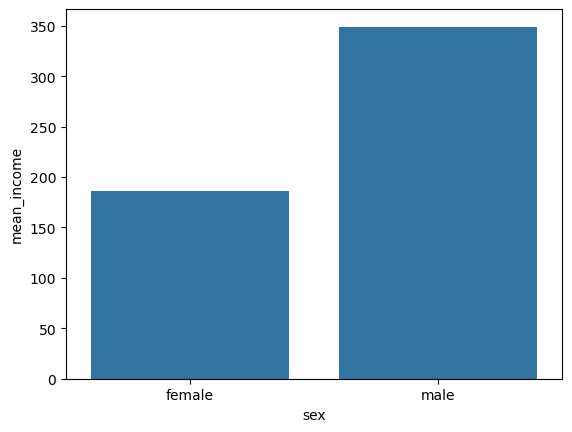

In [65]:
# 그래프 만들기
sns.barplot(data=sex_income, x='sex', y='mean_income')

# 9-3 나이와 월급과의 관계 - 몇 살 때 월급이 가장 많을까 ?
> ## Lab 5 : 나이 변수 검토 및 전처리하기
> ## Lab 6 : 나이와 월급과의 관계 분석하기

## Lab 5 : 나이 변수 검토 및 전처리하기

1. 변수 검토하기

In [69]:
# 출생년도 변수 타입 확인
welfare['birth'].dtypes

dtype('float64')

In [70]:
# 출생년도 요약 통계량 구하기
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

> 출생년도 변수 요약 통계량 분석
- 출생녀도는 1907년 ~ 2018년까지 존재
- 평균 출생년도는 1969년임
- 출생년도는 1948년 ~ 1990년도에 대부분 몰려 있음

<Axes: xlabel='birth', ylabel='Count'>

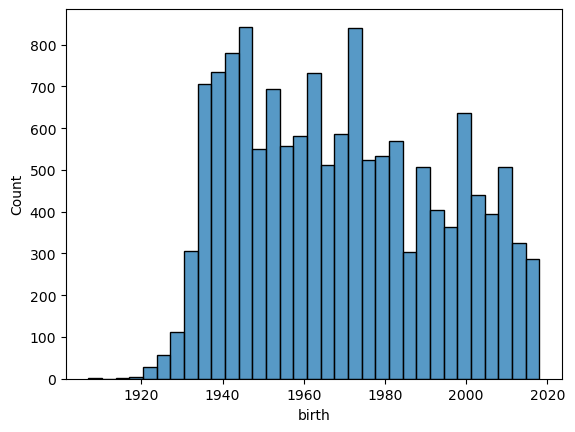

In [72]:
# 히스토 그램 그려보기
sns.histplot(data=welfare, x='birth')

#sns.histplot(data=welfare, x='birth', bins = 10)

2. 전처리
- 무응답의 경우 9999로 코딩함

|   문항 내용   |  모름/응답    |
| ---           | ---           |
| 년            | 9999          |

In [74]:
# 이상치 확인
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

> 출생년도가 1907년 ~ 2018년으로 무응답(9999) 데이터 또는 이상치는 없어 보임

> 이상치(무응답) 데이터 9999가 있는 경우는 결측치로 처리함

In [76]:
# 이상치(9999)를 결측치 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [77]:
# 결측치(nan) 확인
welfare['birth'].isna().sum()

0

> 결측치 없음 확인

3. 파생 변수 만들기
- 태어난 출생연도를 활용하여 나이 변수를 생성
- 2019년 조사가 진행되었음
- 나이(age)는 (2019 - 출생연도 + 1)로 구함 

In [80]:
# 파생 변수 나이(age) 추가하기
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

# welfare['age2'] = 2019-welfare['birth'] + 1

In [81]:
# 파생변수 age의 요약 통계량 구하기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

> 나이는 2세 ~ 113세까지 존재, 평균 연령은 50세, 중간 값은 52세

<Axes: xlabel='age', ylabel='Count'>

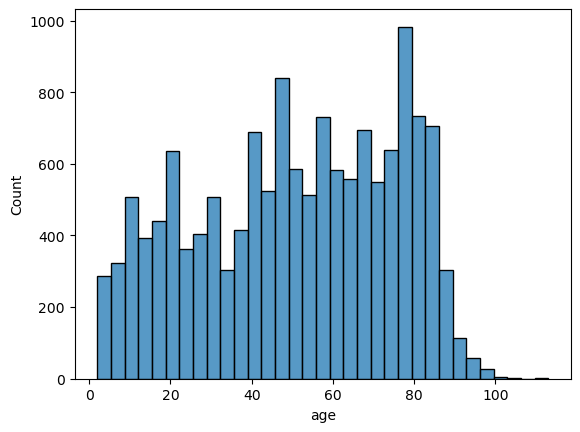

In [83]:
# 히스토그램 그리기
sns.histplot(data=welfare, x='age')

## Lab 6 : 나이와 월급과의 관계 분석하기

1. 나이에 따른 월급 평균표 만들기
- 2세 ~ 113세까지의 월급 평균표 만들기

In [86]:
# 나이에 따른 월급 평균표 만들기
age_income = welfare.dropna(subset = ['income'])\
                    .groupby('age', as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
age_income

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471
...,...,...
69,88.0,27.000000
70,89.0,27.000000
71,90.0,27.000000
72,91.0,20.000000


2. 그래프 만들기
- 요약표를 이용하여 그래프 만들기
- x축 : 나이, y축 : 월급

<Axes: xlabel='age', ylabel='mean_income'>

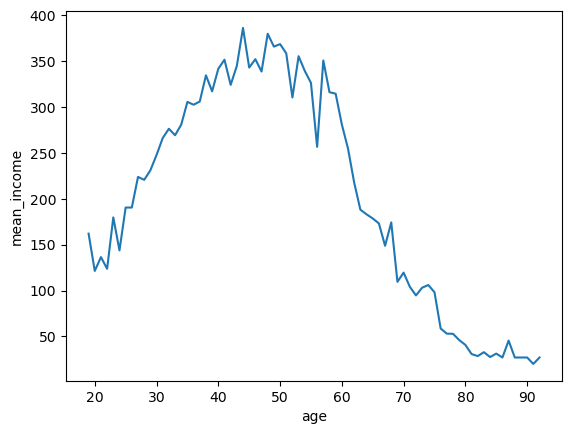

In [88]:
# 선그래프 만들기
sns.lineplot(data=age_income, x='age', y='mean_income')

<Axes: xlabel='age', ylabel='mean_income'>

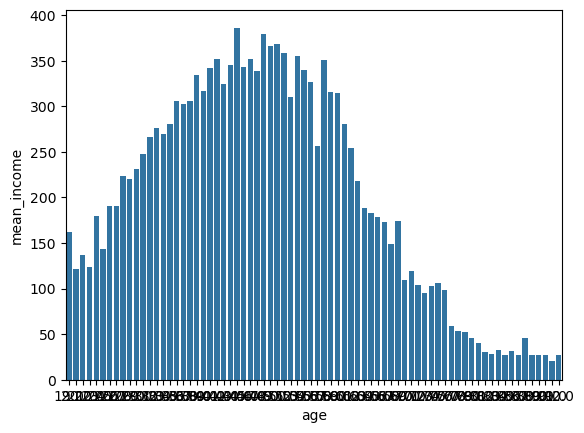

In [89]:
sns.barplot(data=age_income, x='age', y='mean_income')

> 20대 초반 150만원에서 시작하여 지속적으로 증가, 40대에 350만원 가량으로 정점을 찍은 후 감소

> 60대 후반 부터는 20대 보다 낮은 월급

# 9-4 연령대별 월급 차이 - 어느 연령대의 월급이 가장 많을까?
> ## Lab 7 : 연령대 변수 검토 및 전처리
> ## Lab 8 : 연령대에 따른 월급 차이 분석하기

## Lab 7 : 연령대 변수 검토 및 전처리
- 연령대별 기준을 정하여 파생변수 생성
|    범주     |     기준     |
| ---         | -----        |
|초년층       | 30세 미만    |
|중년층       | 30세 ~ 59세  |
|노년층       | 60세 이상    |

In [93]:
# 나이 변수 살펴 보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [94]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] < 60, 'middle',
                                                               'old' )))

# welfare['ageg'] = np.where(welfare['age'] < 30 , 'young',
#                  np.where(welfare['age'] < 60 , 'middle', 'old'))


In [95]:
# 연령대별 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

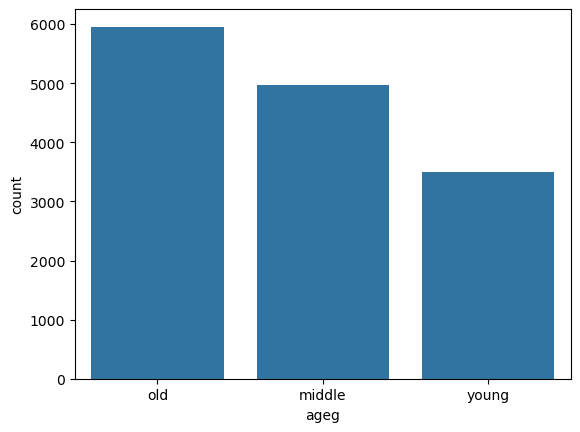

In [96]:
# 연령대별 빈도 막대 그래프 그리기
sns.countplot(data=welfare, x='ageg')

## Lab 8 : 연령대에 따른 월급 차이 분석하기

1. 연령대 별 월급 평균표 만들기

In [99]:
# 연령대 별 월급 평균표 만들기
ageg_income = welfare.dropna(subset=['income'])\
                    .groupby('ageg', as_index=False)\
                    .agg(mean_income=('income', 'mean')) 

In [100]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

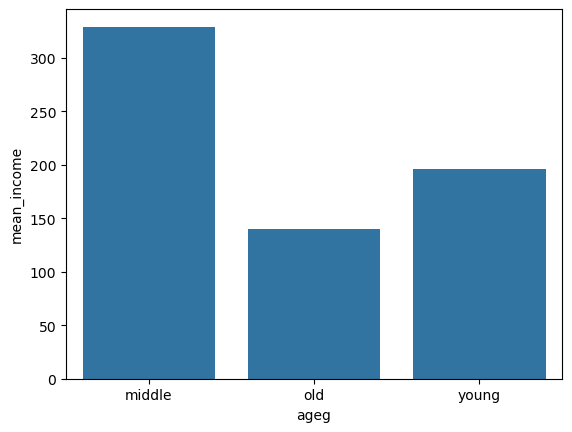

In [102]:
# 막대 그래프 만들기
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

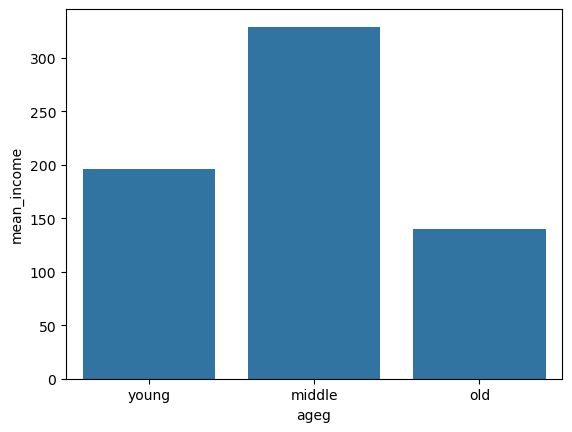

In [103]:
# 막대 그래프 정렬하기
sns.barplot(data=ageg_income, x='ageg', y='mean_income'\
            ,order=['young', 'middle', 'old'])

> 중녕층이 330만원 정도로 가장 많은 월급을 받고, 노년층은 140만원 정도로 초년층의 195만원 보다 적게 받음

#
# 9-5 연령대별 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
> ## Lab 9 : 연령대 및 성별 월급 차이 분석하기
> ## Lab 10 : 나이 및 성별 월급 차이 분석하기

## Lab 9 : 연령대 및 성별 월급 차이 분석하기
- 연령대 및 성별에 따른 월급 평균 표 만들기

In [107]:
# 연령대 및 성별에 따른 월급 평균 표 만들기
#welfare.groupby('sex')
#welfare.groupby('ageg')
ageg_sex_income =  welfare.dropna(subset = ['income'])\
                        .groupby(['ageg', 'sex'], as_index=False)\
                            .agg(mean_income = ('income', 'mean'))
ageg_sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

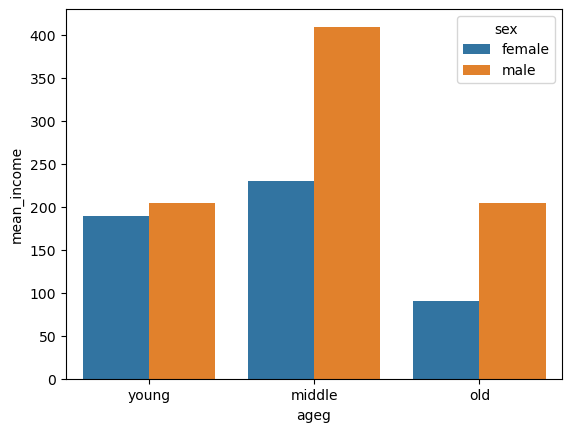

In [109]:
# 막대 그래프 만들기
sns.barplot(data=ageg_sex_income, x='ageg', y='mean_income', hue='sex',
            order = ['young', 'middle', 'old'])

> 데이터 분석
- 성별 월급 차이가 초년에는 차이가 없다가 중년에 차이가 생겨 남성이 179만원 정보 많음
- 노년에는 성별 월급 차이가 줄지만 여전히 남성이 114만원 가량 더 많음
- 노년층이 초년층에 비해 월급이 줄어 들지만, 성별로 보면 노년층이 초년층에 비해 월급이 줄어드는 현상은 여성에 국한됨
- 중년층이 초년층에 비해 월금이 많아지는 현상도, 여성만으로 국한하면 여성은 중년층이 초년층과 크게 차이나지 않음

## Lab 10 : 나이 및 성별 월급 차이 분석하기
- 선 그래프를 이용하여 나이 및 성별에 따른 차이 분석

In [112]:
# 나이 및 성별 월급 평균표 만들기
result = welfare.dropna(subset = ['income'])\
            .groupby(['age','sex'], as_index=False)\
            .agg(age_sex_income_mean = ('income','mean'))
result

,age,sex,age_sex_income_mean
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='age_sex_income_mean'>

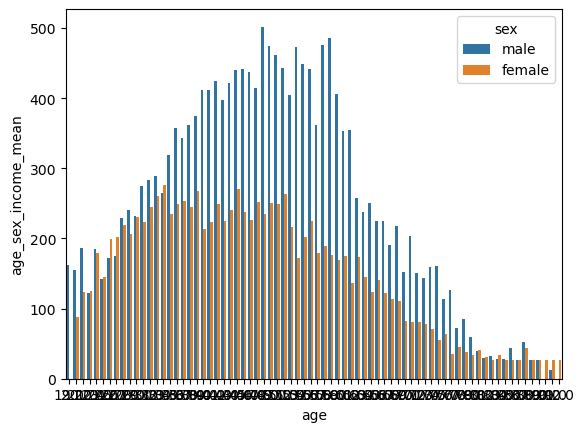

In [113]:
sns.barplot(data=result, x='age', y= 'age_sex_income_mean', hue='sex')

<Axes: xlabel='age', ylabel='age_sex_income_mean'>

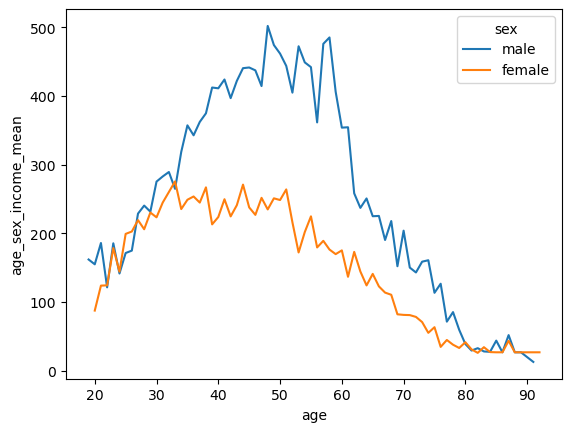

In [114]:
sns.lineplot(data=result, x='age', y= 'age_sex_income_mean', hue='sex') 

> 데이터 분석
- 남성의 월급은 50세 전후까지 증가하다가 급속히 감소
- 여성의 월급은 30세 초반까지 약간 증가하다가 완만하게 감소
- 성별 월급 차이는 30대 중반 부터 벌어지다가 50대에 크게 벌어지고, 이후 점점 줄어들어 80대가 되면 비슷해짐